In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
columns = list(df.columns)
X = df[columns[:-1]]
y = df[columns[-1]]

In [12]:
X.head()

,Position,Level
0,Business Analyst,1
1,Junior Consultant,2
2,Senior Consultant,3
3,Manager,4
4,Country Manager,5


In [13]:
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [8]:
X.isna().sum()

Position    0
Level       0
dtype: int64

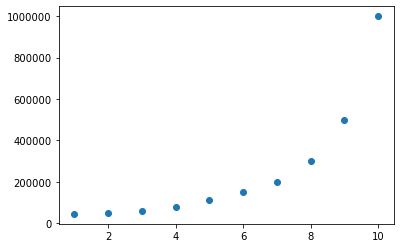

In [14]:
plt.scatter(X['Level'],y)

In [20]:
X.drop('Position',axis = 1, inplace = True)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [22]:
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [23]:
# We don't have enough data to split the data in train and test. So we will take whole data in training


In [28]:
# We will create two models, one : Linear Regression and the other one is Polynomial Regression just to 
# compare and see the results.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [29]:
model_linear = LinearRegression()
model_linear.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Todo : Understand the theory of Polynomial Features

In [63]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

In [64]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [65]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [66]:
model_poly = LinearRegression()
model_poly.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

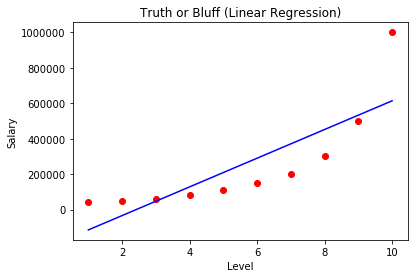

In [67]:
#Now we have both the regressor ready

#Visualize the Linear Regression Model
plt.scatter(X,y,color = 'red')
plt.plot(X,model_linear.predict(X),color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

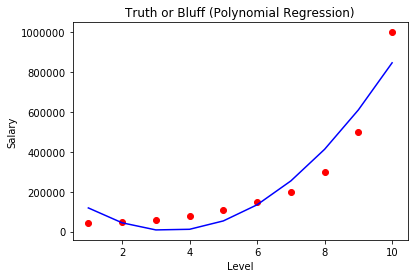

In [68]:

#Visualize the Polynomial Regression Model
plt.scatter(X,y,color = 'red')
plt.plot(X,model_poly.predict(X_poly),color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [74]:
#If the employee says that my level was was and my salary awas this, we have to tell whether 
# they are bluffing or not, he/she was telling 160k with level of 6.5

In [72]:
#Let's start with the Linear Regression Model
model_linear.predict([[6.5]])

array([330378.78787879])

In [83]:
#Polynomial Regression
model_poly.predict(poly.fit_transform([[6.5]]))

array([189498.10606061])

In [85]:
#Well employee was not wrong, it does seem like he/she was getting above 160k, but if we would have gone
# with linear regression we would have given him/her double that expected. So good job!